In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
import random
from random import shuffle 
from PIL import Image
from tqdm import tqdm 
from PIL import Image

from imageio import imread
import scipy.ndimage
import scipy 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
path = "C:/Users/vasud/Desktop/MS in Software Engineering SJSU/Fall 2020/255 - Data Mining/Rentinal Classification Project/resized_train/resized_train/"

In [2]:
labels = pd.read_csv('C:/Users/vasud/Desktop/MS in Software Engineering SJSU/Fall 2020/255 - Data Mining/Rentinal Classification Project/resized_train/trainLabels.csv')
labels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


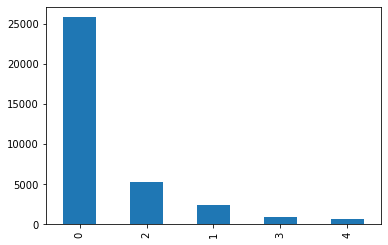

In [3]:
labels["level"].value_counts().plot(kind="bar")

In [4]:
%%time
level_0 = labels["image"][labels['level'] == 0].tolist()
level_1 = labels["image"][labels['level'] == 1].tolist()
level_2 = labels["image"][labels['level'] == 2].tolist()
level_3 = labels["image"][labels['level'] == 3].tolist()
level_4 = labels["image"][labels['level'] == 4].tolist()

no_DR = random.choices(level_0, k=2832)
level_1 = random.choices(level_1,k=708)
level_2 = random.choices(level_2,k=708)
level_3 = random.choices(level_3,k=708)
level_4 = random.choices(level_4,k=708)
with_DR = np.concatenate((level_1,level_2,level_3,level_4))


Train_no_DR = [cv2.imread(path+"/"+str(x)+".jpeg") for x in no_DR]
print("Reading into Train_no_DR done")
Train_with_DR = [cv2.imread(path+"/"+str(x)+".jpeg") for x in with_DR]
print("Reading into Train_with_DR done")
image_size = 128


# Y Train values
y_Train_no_DR = [0]*len(no_DR)
y_Train_with_DR = [1]*len(level_1) + [2]*len(level_2) + [3]*len(level_3) + [4]*len(level_4)

Reading into Train_no_DR done
Reading into Train_with_DR done
Wall time: 8min 52s


In [5]:
len(y_Train_no_DR),len(y_Train_with_DR)

(2832, 2832)

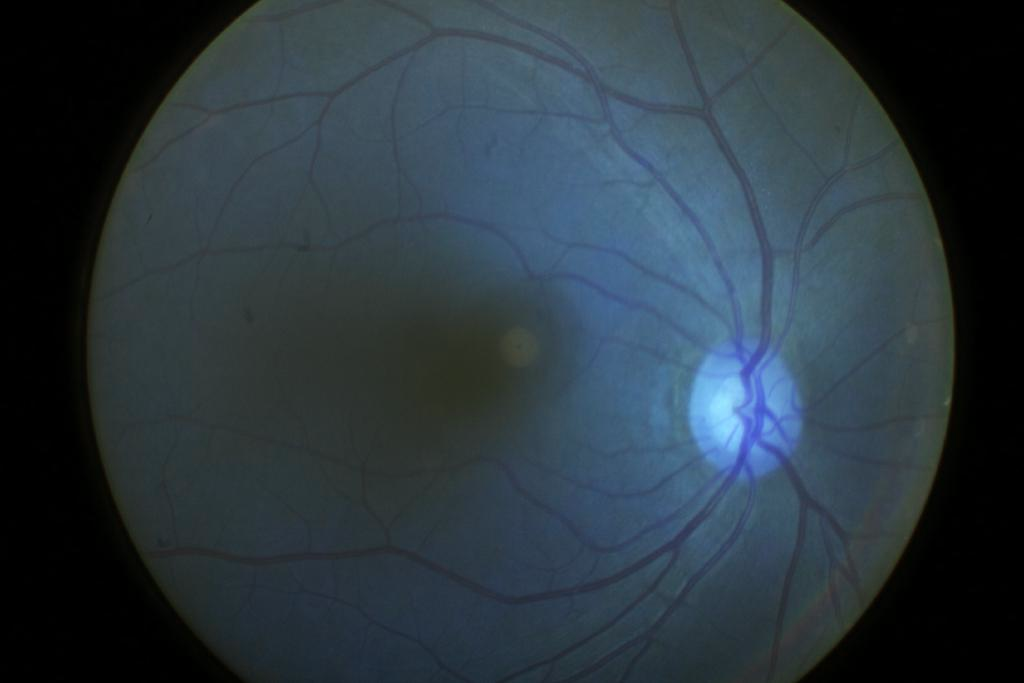

In [6]:
Image.fromarray(Train_no_DR[13])

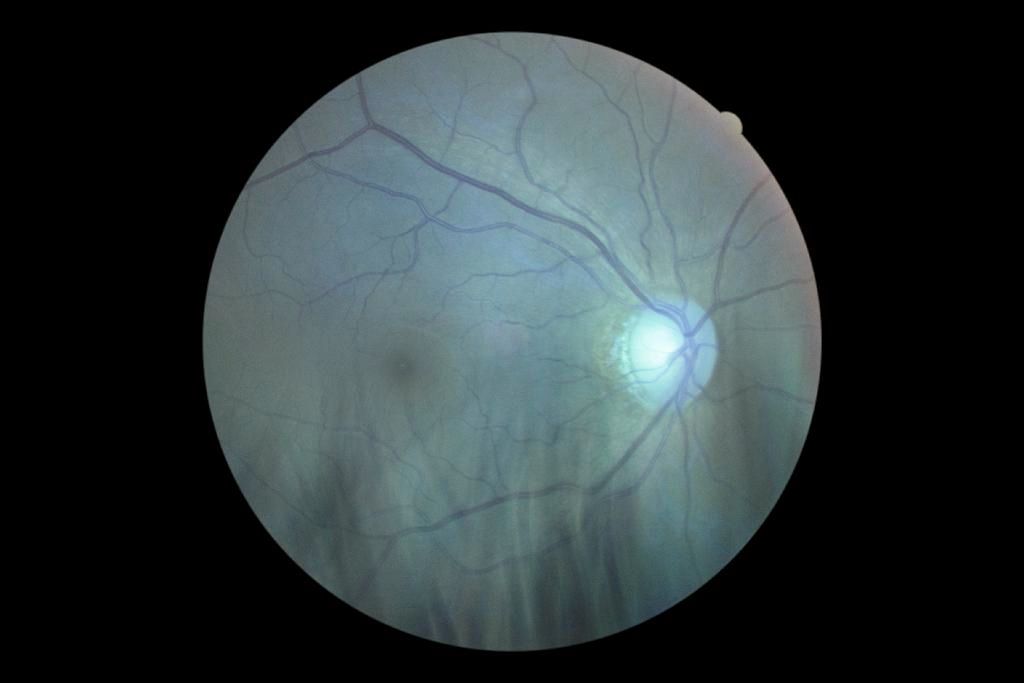

In [7]:
Image.fromarray(Train_with_DR[0])

Text(0.5, 1.0, 'images with and without Diabetic Retenopathy in GrayScale')

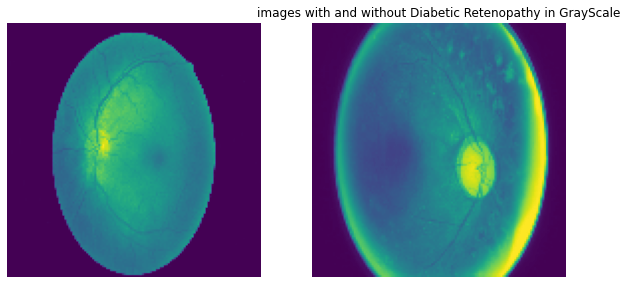

In [8]:
exp_lis = []
for image in Train_no_DR:
    try:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (image_size, image_size)).flatten()
        np_img = np.asarray(img)
    except:
        exp_lis.append(image)
    
for image2 in Train_with_DR:
    try:
        img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        np_img2 = np.asarray(img2)
    except:
        exp_lis.append(image2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("images with and without Diabetic Retenopathy in GrayScale")

In [9]:
print(exp_lis)

[]


In [10]:
def train_data():
    train_data_no_DR = [] 
    train_data_with_DR=[]
    exp_list = []
    for image1 in Train_no_DR:
        try:
            img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            img1 = cv2.resize(img1, (image_size, image_size))
            train_data_no_DR.append(img1)
        except:
            exp_list.append(image)
        
    for image2 in Train_with_DR:
        try:
            img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
            img2 = cv2.resize(img2, (image_size, image_size))
            train_data_with_DR.append(img2)
        except:
            exp_list.append(image2)
 
    train_data= np.concatenate((np.asarray(train_data_no_DR),np.asarray(train_data_with_DR)),axis=0)
    return train_data 

In [11]:
traindata = train_data() 

In [12]:
x_data = traindata
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
y_data = pd.Series(y_Train_no_DR+y_Train_with_DR)

In [14]:
y_data.value_counts()

0    2832
3     708
2     708
1     708
4     708
dtype: int64

In [15]:
print("X shape: " , x_data.shape)
print("Y shape: " , len(y_data))

X shape:  (5664, 128, 128)
Y shape:  5664


In [16]:
number_of_data = x_data.shape[0]
x_flatten = x_data.reshape(number_of_data,x_data.shape[1]*x_data.shape[2])
print("X flatten",x_flatten.shape)

X flatten (5664, 16384)


In [23]:
def one_vs_others(y_data, other_class_lis):
    return y_data.replace(other_class_lis, 9)

In [24]:
def modelling(x_flatten, y_data):
    x_train, x_test, y_train, y_test = train_test_split(x_flatten, y_data, test_size=0.3, random_state=42)
    print("y_data value_counts ", y_data.value_counts())
    print("x train: ",x_train.shape)
    print("x test: ",x_test.shape)
    print("y train: ",y_train.shape)
    print("y test: ",y_test.shape)
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)    
    print(classification_report(y_test, y_pred))

    #     with PCA
    print("WITH PCA")
    reduced_pca = PCA(n_components=0.85)
    reduced_pca.fit(x_train)
    X_train_reduced = reduced_pca.transform(x_train)
    X_test_reduced = reduced_pca.transform(x_test)
    print("Reduced Shape:", X_train_reduced.shape)
    logreg.fit(X_train_reduced, y_train)
    print("Testing Accuracy", logreg.score(X_test_reduced,y_test))
    y_pred = logreg.predict(X_test_reduced)    
    print(classification_report(y_test, y_pred))    

In [25]:
# model0 0 vs others
y_data_0_vs_others = one_vs_others(y_data, [1,2,3,4])
modelling(x_flatten, y_data_0_vs_others)

y_data value_counts  9    2832
0    2832
dtype: int64
x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       877
           9       0.58      0.61      0.60       823

    accuracy                           0.60      1700
   macro avg       0.60      0.60      0.60      1700
weighted avg       0.60      0.60      0.60      1700

WITH PCA
Reduced Shape: (3964, 5)
Testing Accuracy 0.5423529411764706
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       877
           9       0.52      0.63      0.57       823

    accuracy                           0.54      1700
   macro avg       0.55      0.55      0.54      1700
weighted avg       0.55      0.54      0.54      1700



In [26]:
# model1 1 vs others
y_data_1_vs_others = one_vs_others(y_data, [0,2,3,4])
modelling(x_flatten, y_data_1_vs_others)

y_data value_counts  9    4956
1     708
dtype: int64
x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)
              precision    recall  f1-score   support

           1       0.36      0.07      0.11       212
           9       0.88      0.98      0.93      1488

    accuracy                           0.87      1700
   macro avg       0.62      0.52      0.52      1700
weighted avg       0.82      0.87      0.83      1700

WITH PCA
Reduced Shape: (3964, 5)
Testing Accuracy 0.8752941176470588
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       212
           9       0.88      1.00      0.93      1488

    accuracy                           0.88      1700
   macro avg       0.44      0.50      0.47      1700
weighted avg       0.77      0.88      0.82      1700



In [27]:
# model2 2 vs others
y_data_2_vs_others = one_vs_others(y_data, [0,1,3,4])
modelling(x_flatten, y_data_2_vs_others)

y_data value_counts  9    4956
2     708
dtype: int64
x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)
              precision    recall  f1-score   support

           2       0.14      0.02      0.04       189
           9       0.89      0.98      0.93      1511

    accuracy                           0.88      1700
   macro avg       0.51      0.50      0.49      1700
weighted avg       0.81      0.88      0.83      1700

WITH PCA
Reduced Shape: (3964, 5)
Testing Accuracy 0.8888235294117647
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       189
           9       0.89      1.00      0.94      1511

    accuracy                           0.89      1700
   macro avg       0.44      0.50      0.47      1700
weighted avg       0.79      0.89      0.84      1700



In [28]:
# model3 3 vs others
y_data_3_vs_others = one_vs_others(y_data, [0,1,2,4])
modelling(x_flatten, y_data_3_vs_others)

y_data value_counts  9    4956
3     708
dtype: int64
x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)
              precision    recall  f1-score   support

           3       0.37      0.10      0.16       219
           9       0.88      0.98      0.93      1481

    accuracy                           0.86      1700
   macro avg       0.63      0.54      0.54      1700
weighted avg       0.81      0.86      0.83      1700

WITH PCA
Reduced Shape: (3964, 5)
Testing Accuracy 0.8711764705882353
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       219
           9       0.87      1.00      0.93      1481

    accuracy                           0.87      1700
   macro avg       0.44      0.50      0.47      1700
weighted avg       0.76      0.87      0.81      1700



In [29]:
# model4 4 vs others
y_data_4_vs_others = one_vs_others(y_data, [0,1,2,3])
modelling(x_flatten, y_data_4_vs_others)

y_data value_counts  9    4956
4     708
dtype: int64
x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)
              precision    recall  f1-score   support

           4       0.54      0.27      0.36       203
           9       0.91      0.97      0.94      1497

    accuracy                           0.89      1700
   macro avg       0.73      0.62      0.65      1700
weighted avg       0.86      0.89      0.87      1700

WITH PCA
Reduced Shape: (3964, 5)
Testing Accuracy 0.8805882352941177
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       203
           9       0.88      1.00      0.94      1497

    accuracy                           0.88      1700
   macro avg       0.44      0.50      0.47      1700
weighted avg       0.78      0.88      0.82      1700

